In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|brick-sign|');
span {font-family:Roboto; color:black; text-shadow:4px 4px 4px #aaa;}  
h1,h2 {font-family:Roboto; color:slategray; text-shadow:4px 4px 4px #aaa;} 
div.output_subarea, div.output_area pre{font-family:Roboto; font_size:120%; color:darkblue;}
</style> 

In [2]:
import math, sympy, numpy
sympy.init_printing(use_unicode=True)
from sympy import *
import pylab as plt
%matplotlib inline

# Типовой расчет 3 / Standard Calculation 3

## Постановка  задачи / Formulation of the problem:
Решить систему линейных алгебраических уравнений двумя способами: по правилу Крамера и методом Гаусса
        
$
\begin{cases}
8x_1 - 5x_2 - 2x_3 - 2x_4 = 35 \\
-2x_1 + 4x_2 - 4x_3 + x_4 = -8 \\
-2x_1 + x_2 + 4x_3 + 4x_4 = -11 \\
4x_1 + x_2 + 3x_3 + 10x_4 = 10\\
\end{cases}
$

## Решение / Decisions:

### Правило Крамера

Матричный вид записи: Ax=b, где
    
$ A = 
\begin{bmatrix}
8 & -5 & -2 & -2  \\
-2 & 4 & -4 & 1 \\
-2 & 1 & 4 & 4 \\
4 & 1 & 3 & 10
 \end{bmatrix}, \ 
b = 
\begin{bmatrix}
35 \\ -8 \\ -11 \\ 10
 \end{bmatrix}
$.

Вычислим определитель матрицы системы:

$ \Delta = 
\begin{vmatrix}
8 & -5 & -2 & -2  \\
-2 & 4 & -4 & 1 \\
-2 & 1 & 4 & 4 \\
4 & 1 & 3 & 10
 \end{vmatrix}
$.

Вычтем из 2-ой строки 3-ю, из 1-ой - 4-ую, умноженную на 2:

$ \Delta = 
\begin{vmatrix}
0 & -7 & -8 & -22  \\
0 & 3 & -8 & -3 \\
-2 & 1 & 4 & 4 \\
4 & 1 & 3 & 10
 \end{vmatrix}
$.

Сложим 4-ую строку с 3-ей, умноженной на 2:

$ \Delta = 
\begin{vmatrix}
0 & -7 & -8 & -22  \\
0 & 3 & -8 & -3 \\
-2 & 1 & 4 & 4 \\
0 & 3 & 11& 18
 \end{vmatrix}
$.

Разложим по 1-му столбцу:

$ \Delta = -2 *
\begin{vmatrix}
 -7 & -8 & -22  \\
3 & -8 & -3 \\
3 & 11& 18
 \end{vmatrix}
$.

Вычтем из 3-ей строки 2-ую:

$ \Delta = -2 *
\begin{vmatrix}
 -7 & -8 & -22  \\
3 & -8 & -3 \\
0 & 19 & 21
 \end{vmatrix}
$.

К 1-ой строке прибавим 2-ую, умноженную на 2:

$ \Delta = -2 *
\begin{vmatrix}
 -1 & -24 & -28  \\
3 & -8 & -3 \\
0 & 19 & 21
 \end{vmatrix}
$.

К 2-ой строке прибавим 1-ую, умноженную на 3:

$ \Delta = -2 *
\begin{vmatrix}
 -1 & -24 & -28  \\
0 & -80 & -87 \\
0 & 19 & 21
 \end{vmatrix}
$.

Разложим по 1-му столбцу:
    
$ \Delta = -2 * (-1) *
\begin{vmatrix}
-80 & -87 \\
19 & 21
 \end{vmatrix} 
 = 2 * (-80 * 21 - 19 * (-87)) = - 54$.

Так как $\Delta \neq 0$ , то по теореме Крамера система совместна и имеет единственное решение. 

Вычислим вспомогательные определители. 

Определитель $\Delta _i$  получим из определителя $\Delta $ заменой его i-ого столбца столбцом свободных коэффициентов.

Рассчитаем вспомогательные определители аналогично $\Delta $ :

$ \Delta_1 = 
\begin{vmatrix}
35 & -5 & -2 & -2  \\
-8 & 4 & -4 & 1 \\
-11 & 1 & 4 & 4 \\
10 & 1 & 3 & 10
 \end{vmatrix} = -54
\large{\implies x_1 = \frac{\Delta_1}{\Delta} = -54 / (-54) = 1 }$.

$ \Delta_2 = 
\begin{vmatrix}
8 & 35 & -2 & -2  \\
-2 & -8 & -4 & 1 \\
-2 & -11 & 4 & 4 \\
4 & 10 & 3 & 10
 \end{vmatrix} = 270
\large{\implies x_2 = \frac{\Delta_2}{\Delta} = 270 / (-54) = -5 }$.

$ \Delta_3 = 
\begin{vmatrix}
8 & -5 & 35 & -2  \\
-2 & 4 & -8 & 1 \\
-2 & 1 & -11 & 4 \\
4 & 1 & 10 & 10
 \end{vmatrix} = 162
\large{\implies x_3 = \frac{\Delta_3}{\Delta} = 162 / (-54) = -3 }$.

Подставим в последнее уравнение $x_1, x_2, x_3$:

$4 * 1 + 1 * (-5) + 3 * (-3) + 10 * x_4 = 10 \implies 10 * x_4 = 20 \implies x_4 = 2 $

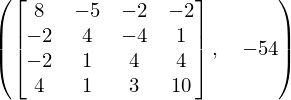

In [38]:
# 1) 
A = sympy.Matrix([[8,-5,-2,-2],[-2,4,-4,1],[-2,1,4,4],[4,1,3,10]])
A, A.det()

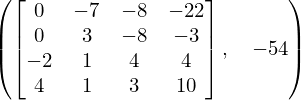

In [46]:
A= sympy.Matrix([[0,-7,-8,-22],[0,3,-8,-3],[-2,1,4,4],[4,1,3,10]])
A, A.det()

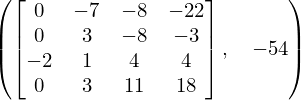

In [47]:
A= sympy.Matrix([[0,-7,-8,-22],[0,3,-8,-3],[-2,1,4,4],[0,3,11,18]])
A, A.det()

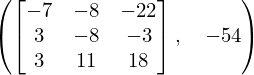

In [49]:
A11= sympy.Matrix([[-7,-8,-22],[3,-8,-3],[3,11,18]])
A11, -2 * A11.det()

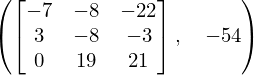

In [50]:
A11= sympy.Matrix([[-7,-8,-22],[3,-8,-3],[0,19,21]])
A11, -2 * A11.det()

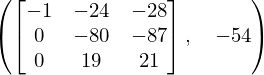

In [53]:
A11= sympy.Matrix([[-1,-24,-28],[0,-80,-87],[0,19,21]])
A11, -2 * A11.det()

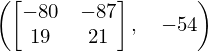

In [56]:
A111= sympy.Matrix([[-80,-87],[19,21]])
A111, -2 * (-1) *  A111.det()

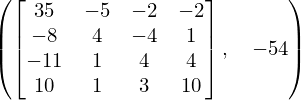

In [58]:
# 2)
A_1 = sympy.Matrix([[35,-5,-2,-2],[-8,4,-4,1],[-11,1,4,4],[10,1,3,10]])
A_1, A_1.det()

In [64]:
x1 = A_1.det() / A.det()
x1

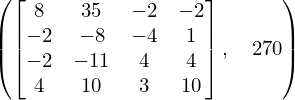

In [62]:
A_2 = sympy.Matrix([[8,35,-2,-2],[-2,-8,-4,1],[-2,-11,4,4],[4,10,3,10]])
A_2, A_2.det()

In [65]:
x2 = A_2.det() / A.det()
x2

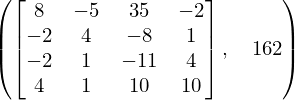

In [66]:
A_3 = sympy.Matrix([[8,-5,35,-2],[-2,4,-8,1],[-2,1,-11,4],[4,1,10,10]])
A_3, A_3.det()

In [67]:
x3 = A_3.det() / A.det()
x3

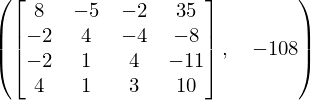

In [68]:
A_4 = sympy.Matrix([[8,-5,-2,35],[-2,4,-4,-8],[-2,1,4,-11],[4,1,3,10]])
A_4, A_4.det()

In [69]:
x4 = A_4.det() / A.det()
x4

### Метод Гаусса

Запишем расширенную матрицу:

$
 \left(\begin{array}{cccc|c}
8 & -5 & -2 & - 2 &  35 \\
-2 & 4 & -4 & 1 &  -8 \\
-2 & 1 & 4 & 4 & -11 \\
4 & 1 & 3 & 10 & 10 
 \end{array}\right)
 $
 
Умножим 2-ую и 3-ю строки на 4, 4-ую - на -2 и сложим с 1-ой:
 
 $
 \left(\begin{array}{cccc|c}
8 & -5 & -2 & - 2 &  35 \\
0 & 11 & -18 & 2 &  3 \\
0 & -1 & 14 & 14 & -9 \\
0 & -7 & -8 & -22 & 15
 \end{array}\right)
 $
 
 Умножим 3-ю строчку на 11 и сложим со 2-й; умножим 2-ую на 7, 4-ую - на 11 и сложим:
 
 $
 \left(\begin{array}{cccc|c}
8 & -5 & -2 & - 2 &  35 \\
0 & 11 & -18 & 2 &  3 \\
0 & 0 & 136 & 156 & -96 \\
0 & 0 & -214 & -228 & 186
 \end{array}\right) 
 $
 
 Поделим 3-ю строчку на 4, 4-ую - на 2:
 
 $
 \left(\begin{array}{cccc|c}
8 & -5 & -2 & - 2 &  35 \\
0 & 11 & -18 & 2 &  3 \\
0 & 0 & 34 & 39 & -24 \\
0 & 0 & -107 & -114 & 93
 \end{array}\right) 
 $

Умножим 3-ю строчку на 107, 4-ую - на 34 и сложим:

 $
 \left(\begin{array}{cccc|c}
8 & -5 & -2 & - 2 &  35 \\
0 & 11 & -18 & 2 &  3 \\
0 & 0 & 34 & 39 & -24 \\
0 & 0 & 0 & 297 & 594
 \end{array}\right) 
 $
 
 Поделим 4-ю на 297:
 
  $
 \left(\begin{array}{cccc|c}
8 & -5 & -2 & - 2 &  35 \\
0 & 11 & -18 & 2 &  3 \\
0 & 0 & 34 & 39 & -24 \\
0 & 0 & 0 & 1 & 2
 \end{array}\right) 
 $
 
4-ая строка означает: $x_4 = 2 $.
 
Подставим в 3-е уравнение:
 
 $x_4 = 2 \implies 34x_3 + 39*2 = -24 \implies  34x_3 = -102 \implies x_3 = -3$
 
 Подставим в 2-е уравнение:
 
 $x_4 = 2 , x_3 = -3 \implies 11x_2 - 18 * (-3) + 2 * 2 = 3 \implies 11x_2 = -55 \implies x_2 = -5$
 
 Подставим в 1-ое уравнение:
 
 $x_4 = 2 , x_3 = -3, x_2 = -5 \implies 8x_1 - 5 * (-5) - 2 * (-3) - 2 * 2 = 35 \implies 8x_1 = 8 \implies x_1 = 1$

## Ответ / Answer: (1, -5, -3, 2).

In [57]:
from sympy.abc import a,b,c,d
system = sympy.Matrix([[8,-5,-2, -2,35],[-2,4, -4, 1,-8] ,[-2,1,4,4,-11],[4,1,3,10,10]])
sympy.solve_linear_system(system, a,b,c,d)